If you want to quickly try out the Gemini API, you can use `curl` commands to call the methods in the REST API.

This notebook contains `curl` commands you can run in Google Colab, or copy to your terminal.

To run this notebook, your API key must be stored it in a Colab Secret named GOOGLE_API_KEY. If you are running in a different environment, you can store your key in an environment variable. See [Authentication](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Authentication.ipynb) to learn more.

In [1]:
import os
from google.colab import userdata

In [2]:
os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')

## Run your first prompt

Use the `generateContent` method to generate responses to your prompts. You can pass text directly to `generateContent`.


In [3]:
%%bash

curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?key=$GOOGLE_API_KEY" \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{
      "contents": [{
        "parts":[{"text": "Give me python code to sort a list."}]
        }]
       }' 2> /dev/null

{
  "candidates": [
    {
      "content": {
        "parts": [
          {
            "text": "```python\n# Example list to be sorted\nlist1 = [5, 3, 1, 2, 4]\n\n# Sort the list in ascending order\nlist1.sort()\n\n# Print the sorted list\nprint(list1)\n```\n\nOutput:\n\n```\n[1, 2, 3, 4, 5]\n```"
          }
        ],
        "role": "model"
      },
      "finishReason": "STOP",
      "index": 0,
      "safetyRatings": [
        {
          "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
          "probability": "NEGLIGIBLE"
        },
        {
          "category": "HARM_CATEGORY_HATE_SPEECH",
          "probability": "NEGLIGIBLE"
        },
        {
          "category": "HARM_CATEGORY_HARASSMENT",
          "probability": "NEGLIGIBLE"
        },
        {
          "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
          "probability": "NEGLIGIBLE"
        }
      ]
    }
  ]
}


### Use images in your prompt

Here we download an image from a URL and pass that image in our prompt.

First, we download the image and load it with PIL:

In [5]:
%%bash

curl -o image.jpg "https://www.mos.org/leonardo/sites/mos.org.leonardo/files/uploads/water-wheel.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  311k  100  311k    0     0   508k      0 --:--:-- --:--:-- --:--:--  507k


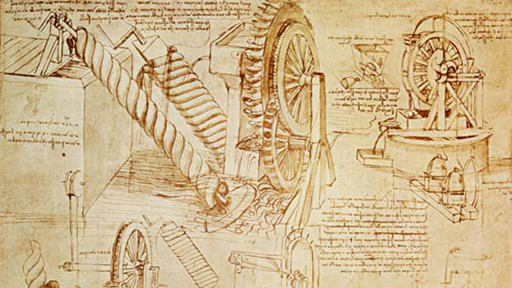

In [6]:
import PIL.Image

img = PIL.Image.open("image.jpg")
img.resize((512, int(img.height*512/img.width)))

Now we will base64 encode the image, and include it in our prompt.

There are slight output differences of different base64 encoding tools, so we have written two examples for you.

The following will work in Google Colab.

In [7]:
%%bash

echo '{
  "contents":[
    {
      "parts":[
        {"text": "This image contains a sketch of a potential product along with some notes.\
Given the product sketch, describe the product as thoroughly as possible based on what you\
see in the image, making sure to note all of the product features. Return output in json format:\
{description: description, features: [feature1, feature2, feature3, etc]}"},
        {
          "inline_data": {
            "mime_type":"image/jpeg",
            "data": "'$(base64 -w0 image.jpg)'"
          }
        }
      ]
    }
  ]
}' > request.json

Then we can include the image in our prompt by just passing in the `request.json` created to `generateContent`. Note that you will need to use the `gemini-pro-vision` model if your prompt contains images.

In [8]:
%%bash

curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-pro-vision:generateContent?key=${GOOGLE_API_KEY}" \
        -H 'Content-Type: application/json' \
        -d @request.json

{
  "candidates": [
    {
      "content": {
        "parts": [
          {
            "text": " {\n  \"description\": \"The image contains a sketch of a machine that appears to be a combination of a water wheel and a screw pump. The water wheel is powered by the flow of water, and the screw pump is used to lift water from a lower level to a higher level.\",\n  \"features\": [\n    \"The machine is powered by the flow of water.\",\n    \"The machine uses a screw pump to lift water from a lower level to a higher level.\",\n    \"The machine is made of wood and metal.\"\n  ]\n}"
          }
        ],
        "role": "model"
      },
      "finishReason": "STOP",
      "index": 0,
      "safetyRatings": [
        {
          "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
          "probability": "NEGLIGIBLE"
        },
        {
          "category": "HARM_CATEGORY_HATE_SPEECH",
          "probability": "NEGLIGIBLE"
        },
        {
          "category": "HARM_CATEGORY_HARASSMENT",


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  417k    0  1184  100  416k    235  84678  0:00:05  0:00:05 --:--:--   311


If you are running on a Mac, copy and paste this command into your terminal instead.

```
curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-pro-vision:generateContent?key=${GOOGLE_API_KEY}" \
        -H 'Content-Type: application/json' \
        -d '{
  "contents":[
    {
      "parts":[
        {"text": "foo"},
        {
          "inline_data": {
            "mime_type":"image/jpeg",
            "data": "'$(base64 -i image.jpg)'"
          }
        }
      ]
    }
  ]
}'   2> /dev/null  | grep -C 5 "text"
```

Here we are `base64` encoding the image, and saving the curl request with the image data in a JSON file. Run this cell to see which version of `base64` you have. Based on the output, you may need to run this request on either a Mac or on Colab.

In [9]:
%%bash

base64 --version | head -n 1

base64 (GNU coreutils) 8.32


If you get `FreeBSD base64 ...`, (Mac) use `base64 -i`.

If you get `base64 (GNU coreutils)...` (Colab) use `base64 -w0`.

### Have a chat

The Gemini API enables you to have freeform conversations across multiple turns.

In [10]:
%%bash
curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?key=$GOOGLE_API_KEY" \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{
      "contents": [
        {"role":"user",
         "parts":[{
           "text": "In one sentence, explain how a computer works to a young child."}]},
        {"role": "model",
         "parts":[{
           "text": "A computer is like a smart helper that can store information, do math problems, and follow our instructions to make things happen."}]},
        {"role": "user",
         "parts":[{
           "text": "Okay, how about a more detailed explanation to a high schooler?"}]},
      ]
    }' 2> /dev/null | grep -C 5 "text"

  "candidates": [
    {
      "content": {
        "parts": [
          {
            "text": "A computer is an electronic device that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components of the computer, and software, which are the programs that run on the computer. The hardware includes the central processing unit (CPU), which is the \"brain\" of the computer and controls all of its operations; the memory, which stores data and instructions; and the input and output devices, such as the keyboard, mouse, and monitor. The software includes the operating system, which manages the computer's resources and provides a way for users to interact with the computer; and the application programs, which are used to perform specific tasks, such as word processing, spreadsheets, and games.\n\nWhen you give a computer a command, the CPU fetches the instructions for that command from memory and executes them. The results of the instructions

**Note**: Make sure to use `gemini-pro` and text-only input for chat use cases.

### Configuration

Every prompt you send to the model includes parameter values that control how the model generates a response. The model can generate different results for different parameter values. Learn more about [model parameters](https://ai.google.dev/docs/concepts#model_parameters).

For instance, `temperature` controls the degree of randomness in token selection. Use higher values for more creative responses, and lower values for more deterministic responses.

The following example specifies values for all the parameters of the `generateContent` method.

In [ ]:
%%bash

curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?key=$GOOGLE_API_KEY" \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{
        "contents": [{
            "parts":[
                {"text": "Give me a numbered list of cat facts."}
            ]
        }],
        "safetySettings": [
            {
                "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
                "threshold": "BLOCK_ONLY_HIGH"
            }
        ],
        "generationConfig": {
            "stopSequences": [
                "Title"
            ],
            "temperature": 0.9,
            "maxOutputTokens": 2000,
        }
    }'  2> /dev/null | grep "text"

            "text": "1. Cats have 32 muscles in their ears, allowing them to rotate them 180 degrees.\n2. The average lifespan of a domestic cat is 12-15 years.\n3. Cats have five toes on their front paws and four on their back paws.\n4. A group of cats is called a clowder or a glaring.\n5. Cats have a keen sense of smell, with approximately 200 million scent receptors in their noses.\n6. Cats are obligate carnivores, meaning they must eat meat to survive.\n7. The domestication of cats began around 9,000 years ago in the Middle East.\n8. Cats have a unique organ called the Jacobson's organ, which helps them detect scents and pheromones.\n9. Cats can purr at a frequency of 25-150 hertz, which is believed to have therapeutic effects.\n10. The world's smallest cat breed is the Singapura, which weighs around 4-8 pounds."


## Next steps

The Gemini API has configurable safety settings. Learn more [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/rest/Safety_REST.ipynb).